In [1]:
#importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\ayush\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\ayush\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist=tf.keras.datasets.mnist

In [4]:
#x is pixel data (image) and y is classification data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [5]:
#normalizing
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
#training the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2587 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1055 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0706 - accuracy: 0.9777


In [9]:
#evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0929 - accuracy: 0.9727
0.09288937598466873
0.9726999998092651


1/1 [==============================] - 0s 20ms/step
Prediction for num1.png: This digit is probably a 0


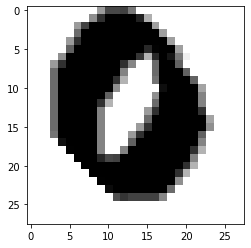

1/1 [==============================] - 0s 20ms/step
Prediction for num2.png: This digit is probably a 8


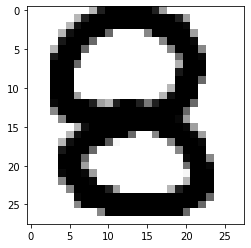

1/1 [==============================] - 0s 21ms/step
Prediction for num3.png: This digit is probably a 5


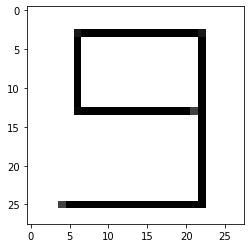

1/1 [==============================] - 0s 22ms/step
Prediction for num4.png: This digit is probably a 2


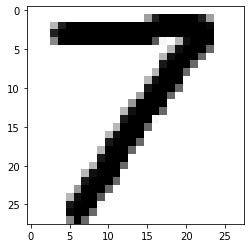

1/1 [==============================] - 0s 22ms/step
Prediction for num5.png: This digit is probably a 5


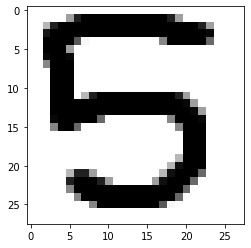

In [30]:
#testing the model
desktop_path = r'C:\Users\ayush\OneDrive\Desktop'
digit_folder = 'digits'
digit_folder_path = os.path.join(desktop_path, digit_folder)
file_names = [f for f in os.listdir(digit_folder_path) if f.endswith('.png')]


for file_name in file_names:
    try:
        # Construct the full file path
        file_path = os.path.join(digit_folder_path, file_name)
        
        # Load and preprocess the image
        img = cv2.imread(file_path)[:,:,0]
        img = np.invert(np.array([img]))  # Invert the colors if necessary
        prediction = model.predict(img)
        
        
        print(f"Prediction for {file_name}: This digit is probably a {np.argmax(prediction)}")
        
        # Display the image
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print("Error!")